In [1]:
import pandas

sw = pandas.read_csv('data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_local/tmscore.csv')
sw['Aligner'] = 'Local'
isw_p5 = pandas.read_csv('data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_i_local_p5/tmscore.csv')
isw_p5['Aligner'] = 'iLocal\n(extend 5)'
isw_p20 = pandas.read_csv('data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_i_local_p20/tmscore.csv')
isw_p20['Aligner'] = 'iLocal\n(extend 20)'
isw_p5p5p20 = pandas.read_csv('data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_i_local_p5p5p20/tmscore.csv')
isw_p5p5p20['Aligner'] = 'iLocal\n(5->5->20)'
swisw_p5p5p20 = pandas.read_csv('data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_local_i_local_p5p5p20/tmscore.csv')
swisw_p5p5p20['Aligner'] = 'Proposed'
tmscore_df = pandas.concat([swisw_p5p5p20, sw, isw_p5, isw_p20, isw_p5p5p20])
tmscore_df

,Unnamed: 0,Aligner,Rank,TM-score,PDB
0,0,Proposed,1,0.64087,d2oi8a1_1.pdb
1,1,Proposed,1,0.78611,d5fb8c__1.pdb
2,2,Proposed,1,0.78924,d3cu5a1_1.pdb
3,3,Proposed,1,0.74840,d3mdqa2_1.pdb
4,4,Proposed,1,0.94969,d2bz6l__1.pdb
...,...,...,...,...,...
9167,9167,iLocal\n(5->5->20),98,0.07777,d3vyca__98.pdb
9168,9168,iLocal\n(5->5->20),94,0.06449,d3vyca__94.pdb
9169,9169,iLocal\n(5->5->20),89,0.08443,d3vyca__89.pdb
9170,9170,iLocal\n(5->5->20),93,0.07758,d3vyca__93.pdb


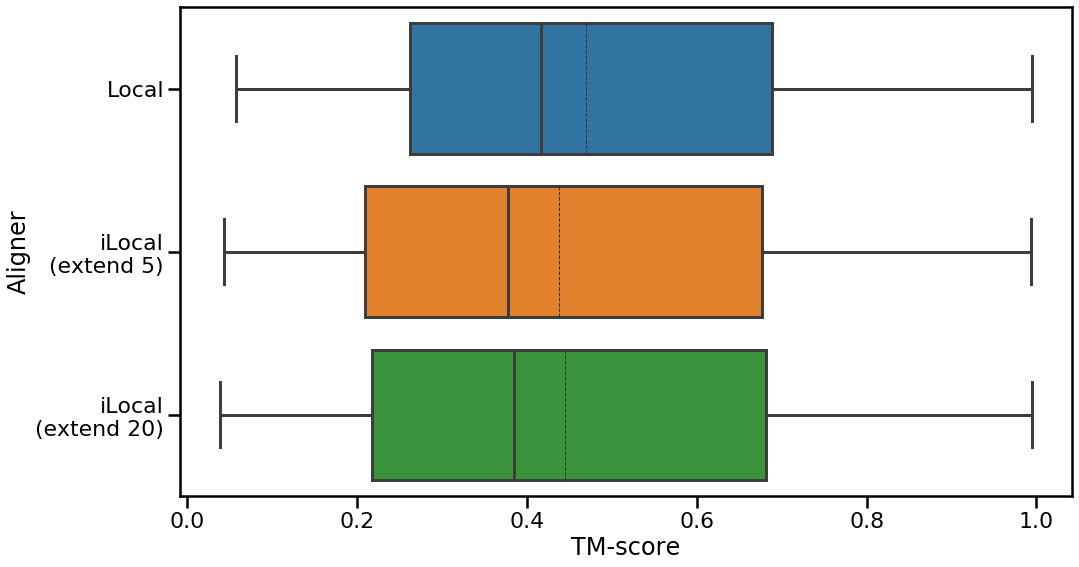

In [2]:
%matplotlib inline
import seaborn
from matplotlib import pyplot

seaborn.set_context('poster')
fig, ax = pyplot.subplots(figsize=(16, 9))
seaborn.boxplot(x='TM-score', y='Aligner',
                data=tmscore_df[(tmscore_df['Aligner'] == 'iLocal\n(extend 5)') | (tmscore_df['Aligner'] == 'Local') | (tmscore_df['Aligner'] == 'iLocal\n(extend 20)')],
                showmeans=True, meanline=True, meanprops={'color': '#333333'}, ax=ax)
fig.savefig('img/all_tm_1.pdf', bbox_inches='tight', pad_inches=0)

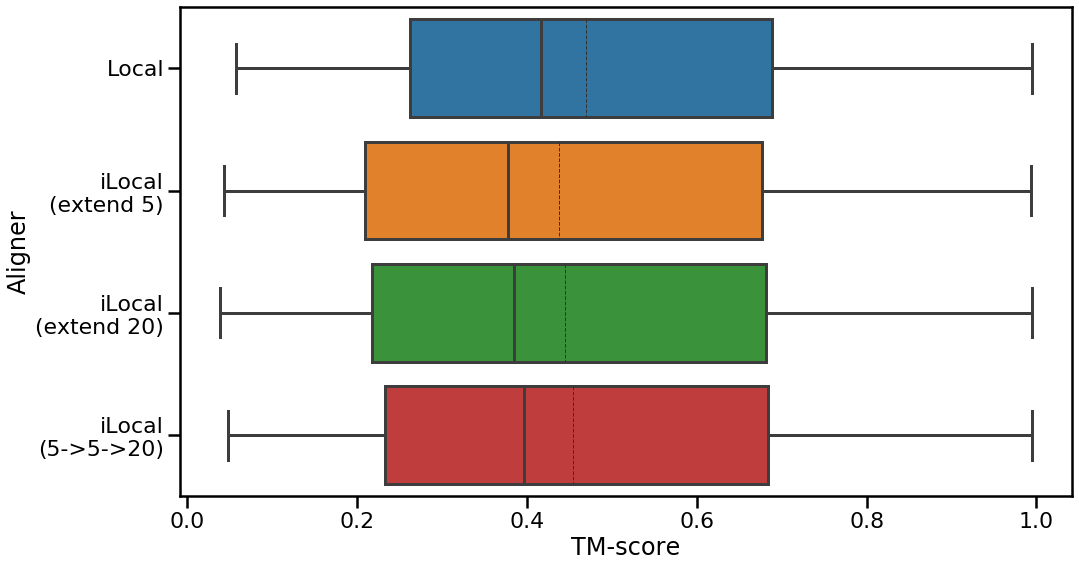

In [3]:
%matplotlib inline
import seaborn
from matplotlib import pyplot

seaborn.set_context('poster')
fig, ax = pyplot.subplots(figsize=(16, 9))
seaborn.boxplot(x='TM-score', y='Aligner',
                data=tmscore_df[(tmscore_df['Aligner'] == 'iLocal\n(extend 5)') | (tmscore_df['Aligner'] == 'Local') | (tmscore_df['Aligner'] == 'iLocal\n(extend 20)') | (tmscore_df['Aligner'] == 'iLocal\n(5->5->20)')],
                showmeans=True, meanline=True, meanprops={'color': '#333333'}, ax=ax)
fig.savefig('img/all_tm_2.pdf', bbox_inches='tight', pad_inches=0)

,Unnamed: 0,Rank,TM-score
count,9442.000000,9442.000000,9442.000000
mean,4720.500000,50.984749,0.482745
std,2725.814955,28.552484,0.231754
min,0.000000,1.000000,0.058480
25%,2360.250000,26.000000,0.268585
50%,4720.500000,51.000000,0.445915
75%,7080.750000,76.000000,0.695367
max,9441.000000,100.000000,0.994530


,Unnamed: 0,Rank,TM-score
count,9462.000000,9462.000000,9462.000000
mean,4730.500000,51.023885,0.469729
std,2731.588457,28.560571,0.234050
min,0.000000,1.000000,0.056990
25%,2365.250000,26.000000,0.261833
50%,4730.500000,51.000000,0.416315
75%,7095.750000,76.000000,0.688478
max,9461.000000,100.000000,0.994530


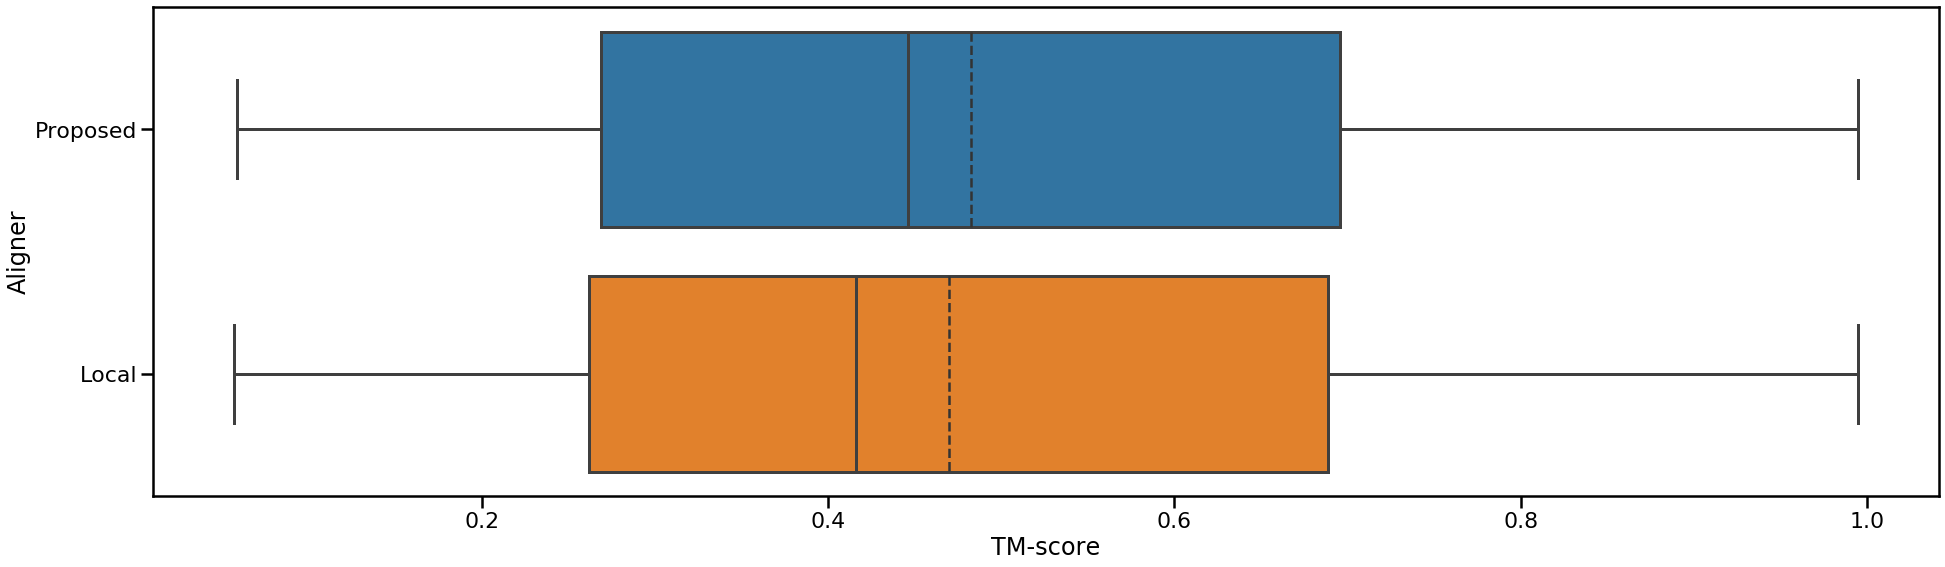

In [3]:
%matplotlib inline
import seaborn
from matplotlib import pyplot

seaborn.set_context('poster')
fig, ax = pyplot.subplots(figsize=(32, 9))
seaborn.boxplot(x='TM-score', y='Aligner',
                data=tmscore_df[(tmscore_df['Aligner'] == 'Proposed') | (tmscore_df['Aligner'] == 'Local')],
                showmeans=True, meanline=True, meanprops={'color': '#333333', 'linewidth': 2.5}, ax=ax)
fig.savefig('img/all_tm_3.pdf', bbox_inches='tight', pad_inches=0)
display(tmscore_df[tmscore_df['Aligner'] == 'Proposed'].describe())
display(tmscore_df[tmscore_df['Aligner'] == 'Local'].describe())

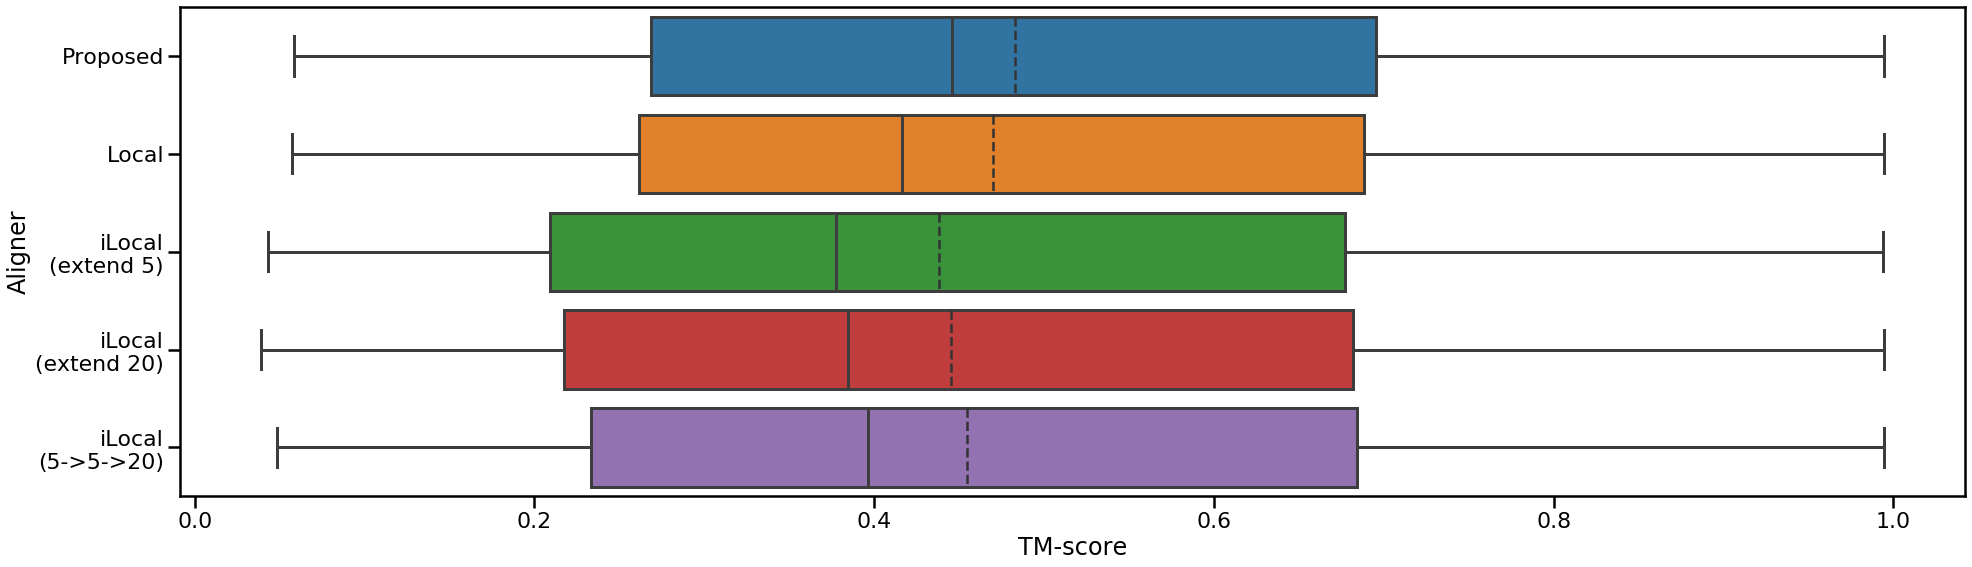

In [8]:
%matplotlib inline
import seaborn
from matplotlib import pyplot

seaborn.set_context('poster')
fig, ax = pyplot.subplots(figsize=(32, 9))
seaborn.boxplot(x='TM-score', y='Aligner', data=tmscore_df, showmeans=True, meanline=True,
                meanprops={'color': '#333333', 'linewidth': 2.5}, ax=ax)
fig.savefig('img/all_tm_4.pdf', bbox_inches='tight', pad_inches=0)

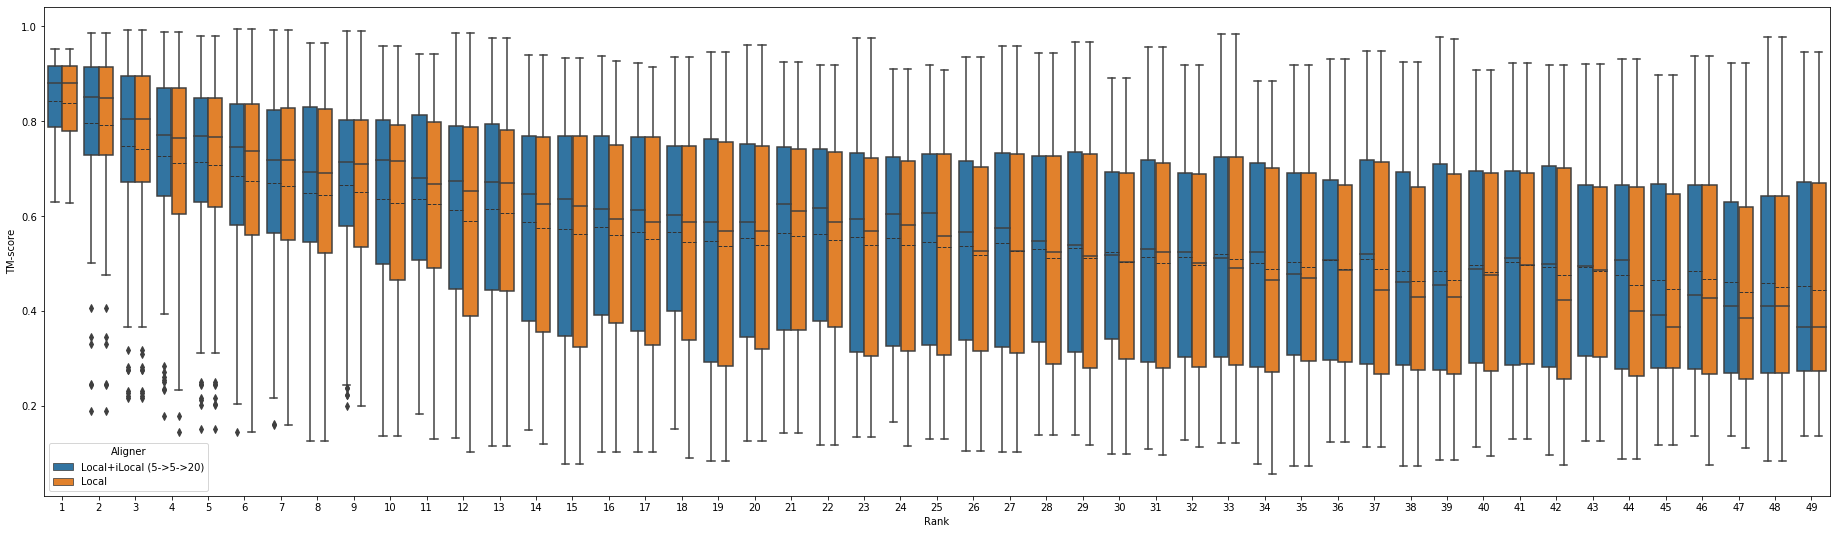

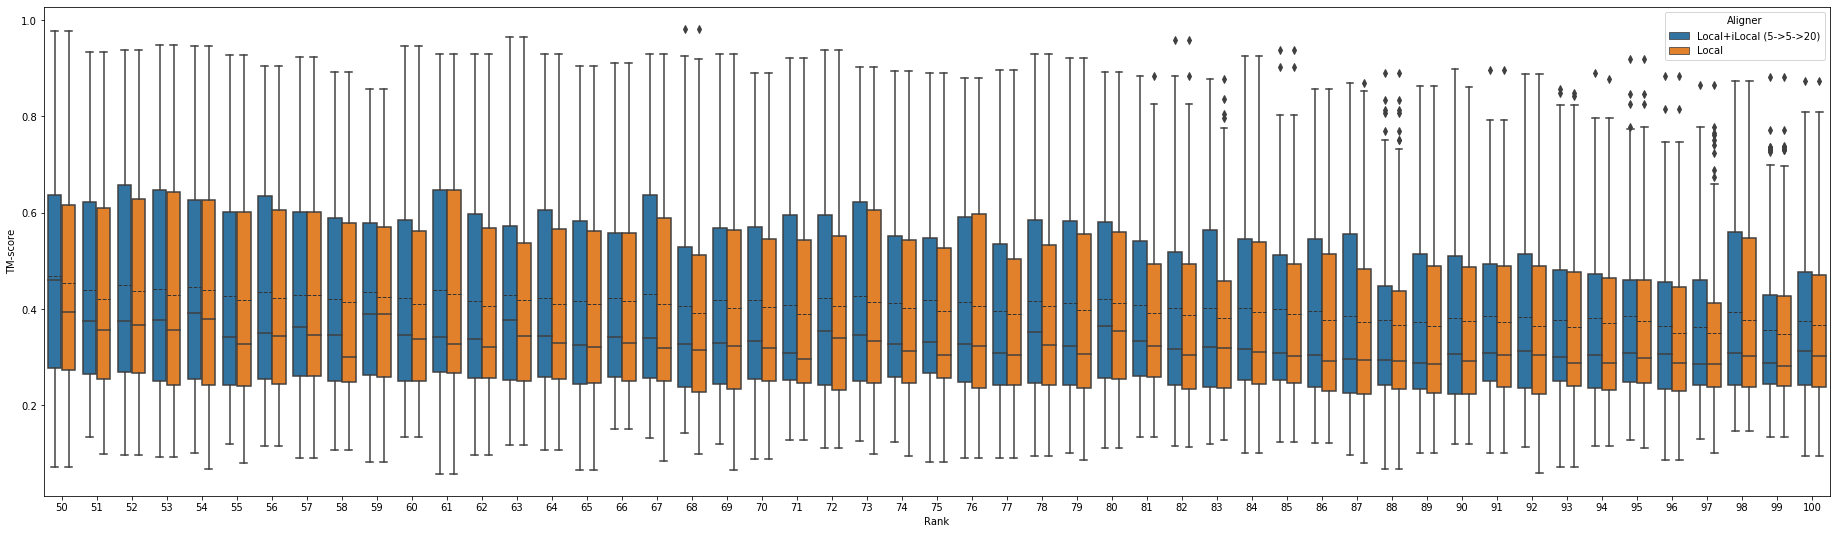

In [17]:
tmscore_df_sub = tmscore_df[(tmscore_df['Aligner'] == 'Local') | (tmscore_df['Aligner'] == 'Local+iLocal (5->5->20)')]
fig, ax = pyplot.subplots(figsize=(32, 9))
seaborn.boxplot(x='Rank', y='TM-score', hue='Aligner',
                data=tmscore_df_sub[tmscore_df_sub['Rank'] < 50],
                showmeans=True, meanline=True, ax=ax, meanprops={'color': '#333333'})
fig.savefig('img/all_tm_rank_1.pdf', bbox_inches='tight', pad_inches=0)
fig, ax = pyplot.subplots(figsize=(32, 9))
seaborn.boxplot(x='Rank', y='TM-score', hue='Aligner',
                data=tmscore_df_sub[(tmscore_df_sub['Rank'] >= 50) & (tmscore_df_sub['Rank'] <= 100)],
                showmeans=True, meanline=True, ax=ax, meanprops={'color': '#333333'})
fig.savefig('img/all_tm_rank_2.pdf', bbox_inches='tight', pad_inches=0)

In [4]:
from pathlib import Path
from Bio import SeqIO
from tqdm.auto import tqdm

diff_df = pandas.merge(tmscore_df[tmscore_df['Aligner'] == 'Local'],
                       tmscore_df[tmscore_df['Aligner'] == 'Proposed'], on='PDB')
diff_df['diff'] = diff_df['TM-score_y'] - diff_df['TM-score_x']
diff_df['Query'] = diff_df['PDB'].apply(lambda _: _[:7])

scop100_idx = SeqIO.index('data/scop/astral-scopedom-seqres-gd-all-2.07-stable.fa', 'fasta')
correct = []
for _, row in tqdm(diff_df.iterrows(), total=diff_df.shape[0]):
    pdb = Path()/'data'/'evaluation'/'delta_u50_50_u50_50_s95_500_evalue_sum_local'/row.PDB
    template = [_ for _ in pdb.read_text().splitlines() if _.startswith('REMARK') and 'TEMPLATE:' in _][0].split()[3]
    if scop100_idx[template].description.split()[1].split('.')[:3] == scop100_idx[row.Query].description.split()[1].split('.')[:3]:
        correct.append(True)
    else:
        correct.append(False)
diff_df['Correct'] = correct
diff_df

,Unnamed: 0_x,Aligner_x,Rank_x,TM-score_x,PDB,Unnamed: 0_y,Aligner_y,Rank_y,TM-score_y,diff,Query,Correct
0,0,Local,1,0.62725,d2oi8a1_1.pdb,0,Proposed,1,0.64087,0.01362,d2oi8a1,True
1,1,Local,1,0.77794,d3cu5a1_1.pdb,2,Proposed,1,0.78924,0.01130,d3cu5a1,True
2,2,Local,1,0.73700,d3mdqa2_1.pdb,3,Proposed,1,0.74840,0.01140,d3mdqa2,True
3,3,Local,1,0.78611,d5fb8c__1.pdb,1,Proposed,1,0.78611,0.00000,d5fb8c_,True
4,4,Local,1,0.88740,d2bbaa1_1.pdb,13,Proposed,1,0.88740,0.00000,d2bbaa1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9431,9457,Local,100,0.25655,d1jl5a__100.pdb,9418,Proposed,100,0.25655,0.00000,d1jl5a_,False
9432,9458,Local,100,0.33394,d1q0qa3_100.pdb,9413,Proposed,100,0.33371,-0.00023,d1q0qa3,False
9433,9459,Local,100,0.24995,d1pvza__100.pdb,9411,Proposed,100,0.24995,0.00000,d1pvza_,False
9434,9460,Local,100,0.32646,d3q9va__100.pdb,9416,Proposed,100,0.32646,0.00000,d3q9va_,False


In [5]:
correct_df = diff_df[diff_df['Correct']]
correct_df = pandas.concat([
    pandas.DataFrame({
        'Aligner': correct_df['Aligner_y'],
        'Rank': correct_df['Rank_y'],
        'TM-score': correct_df['TM-score_y']
    }),
    pandas.DataFrame({
        'Aligner': correct_df['Aligner_x'],
        'Rank': correct_df['Rank_x'],
        'TM-score': correct_df['TM-score_x']
    })
])
correct_df

,Aligner,Rank,TM-score
0,Proposed,1,0.64087
1,Proposed,1,0.78924
2,Proposed,1,0.74840
3,Proposed,1,0.78611
4,Proposed,1,0.88740
...,...,...,...
9401,Local,100,0.24167
9406,Local,100,0.58437
9412,Local,100,0.37525
9416,Local,100,0.50014


,Rank,TM-score
count,5325.000000,5325.000000
mean,42.403756,0.647246
std,27.995438,0.165407
min,1.000000,0.123100
25%,18.000000,0.522640
50%,38.000000,0.671100
75%,65.000000,0.771320
max,100.000000,0.994530


,Rank,TM-score
count,5325.000000,5325.000000
mean,42.403756,0.629508
std,27.995438,0.181755
min,1.000000,0.075910
25%,18.000000,0.496660
50%,38.000000,0.658060
75%,65.000000,0.767890
max,100.000000,0.994530


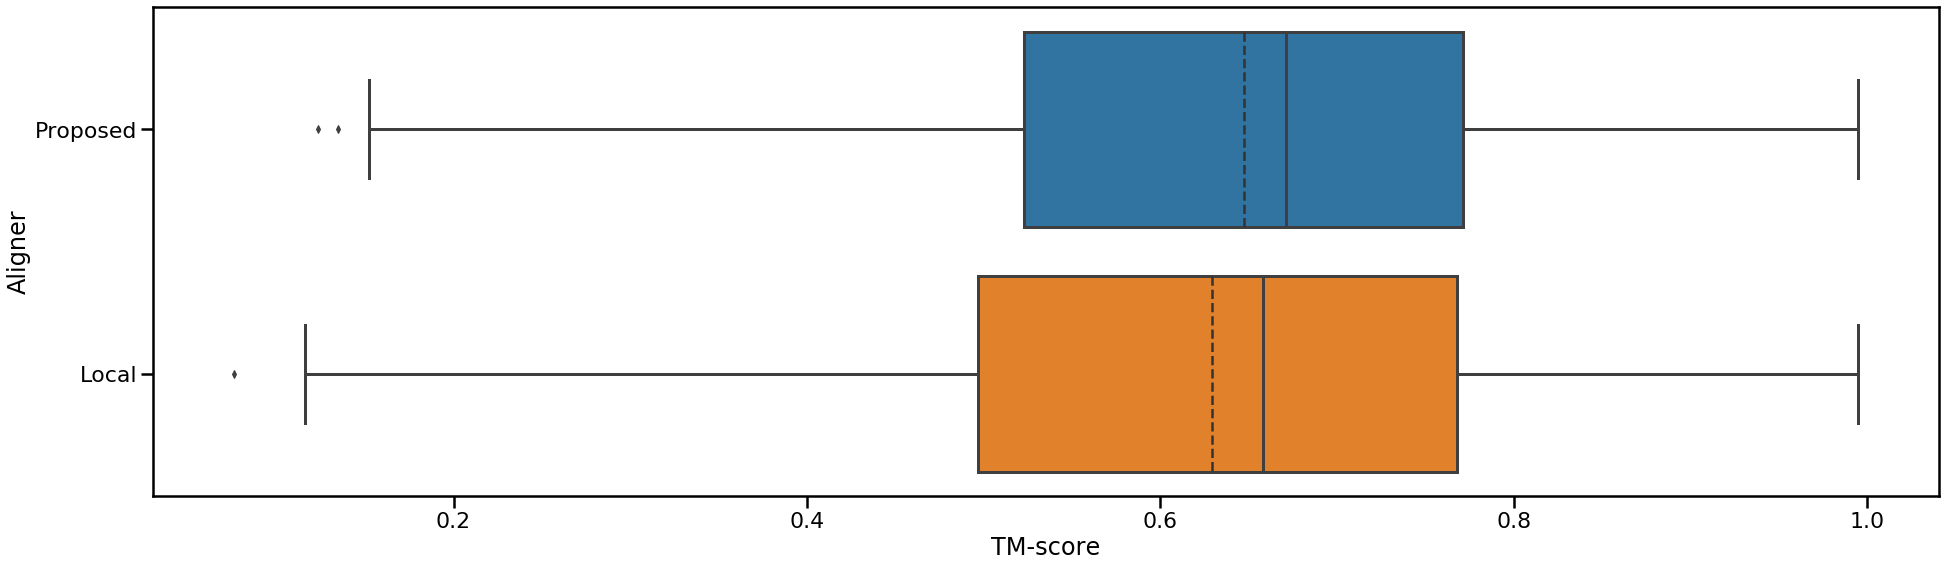

In [6]:
seaborn.set_context('poster')
fig, ax = pyplot.subplots(figsize=(32, 9))
seaborn.boxplot(x='TM-score', y='Aligner', data=correct_df, showmeans=True, meanline=True,
                meanprops={'color': '#333333', 'linewidth': 2.5}, ax=ax)
fig.savefig('img/correct_tm.pdf', bbox_inches='tight', pad_inches=0)
display(correct_df[correct_df['Aligner'] == 'Proposed'].describe())
display(correct_df[correct_df['Aligner'] == 'Local'].describe())

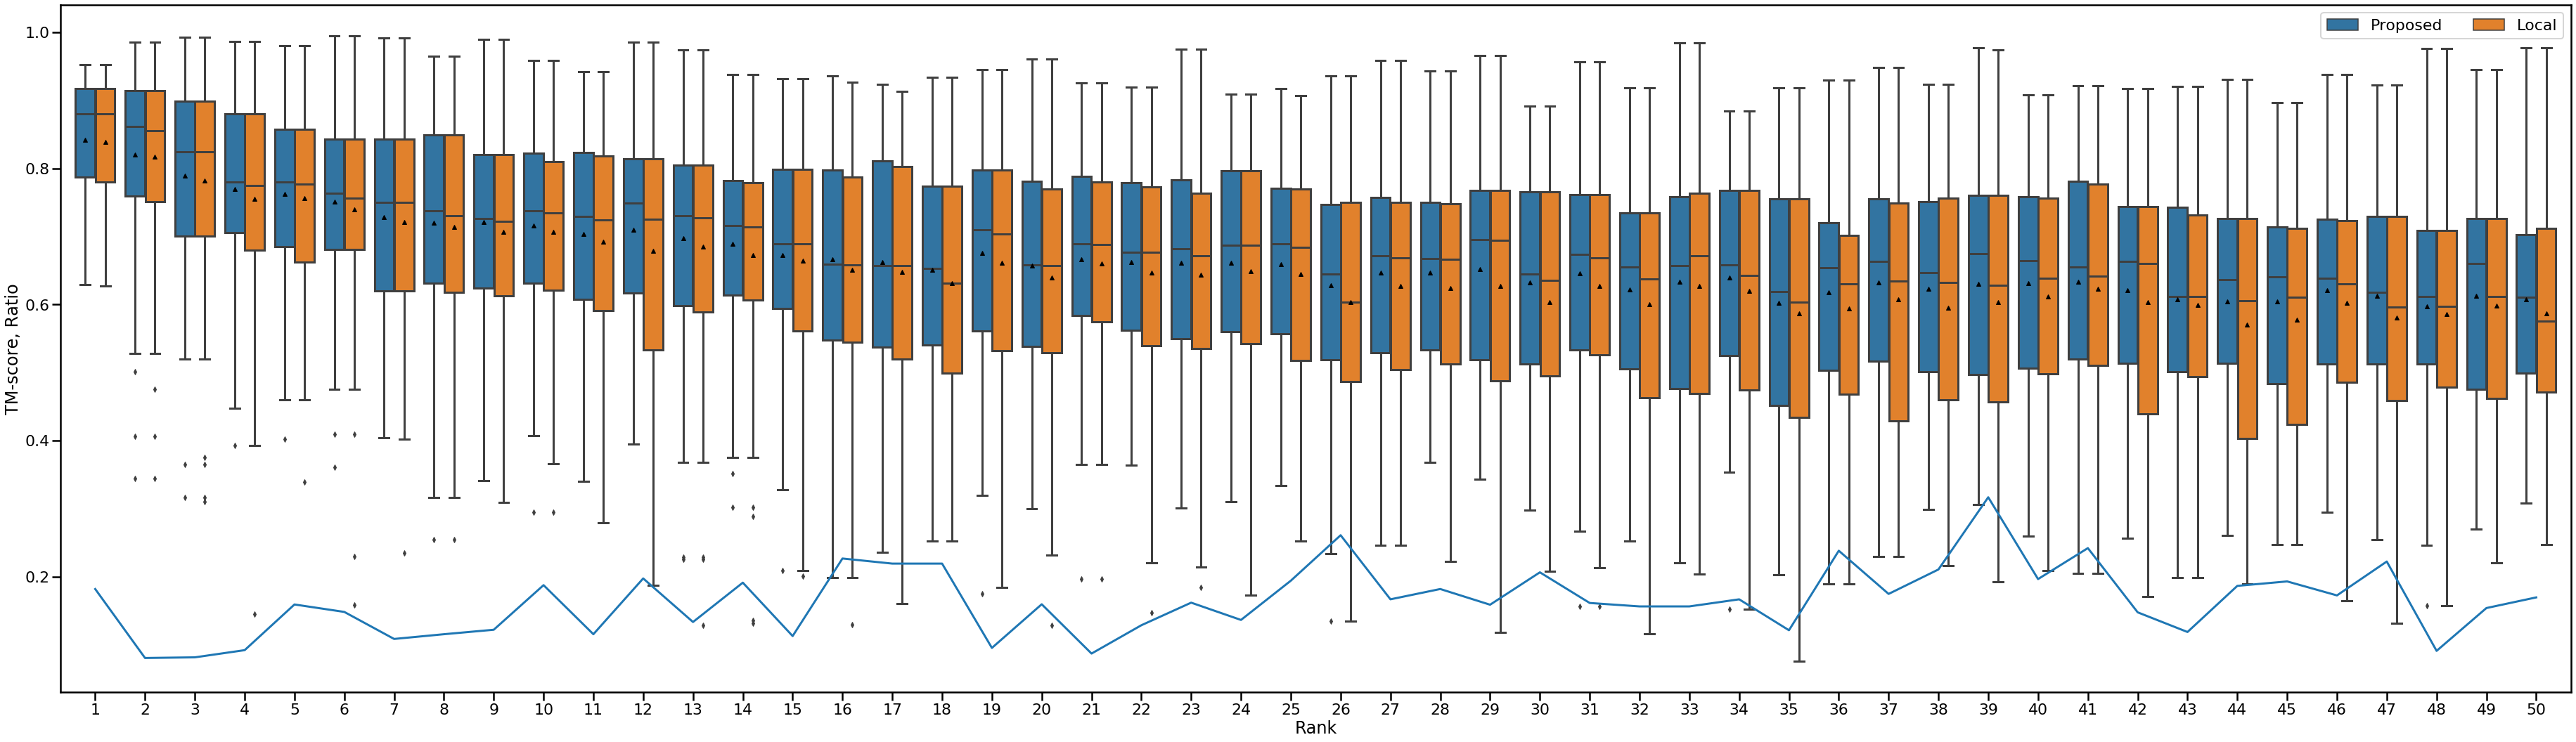

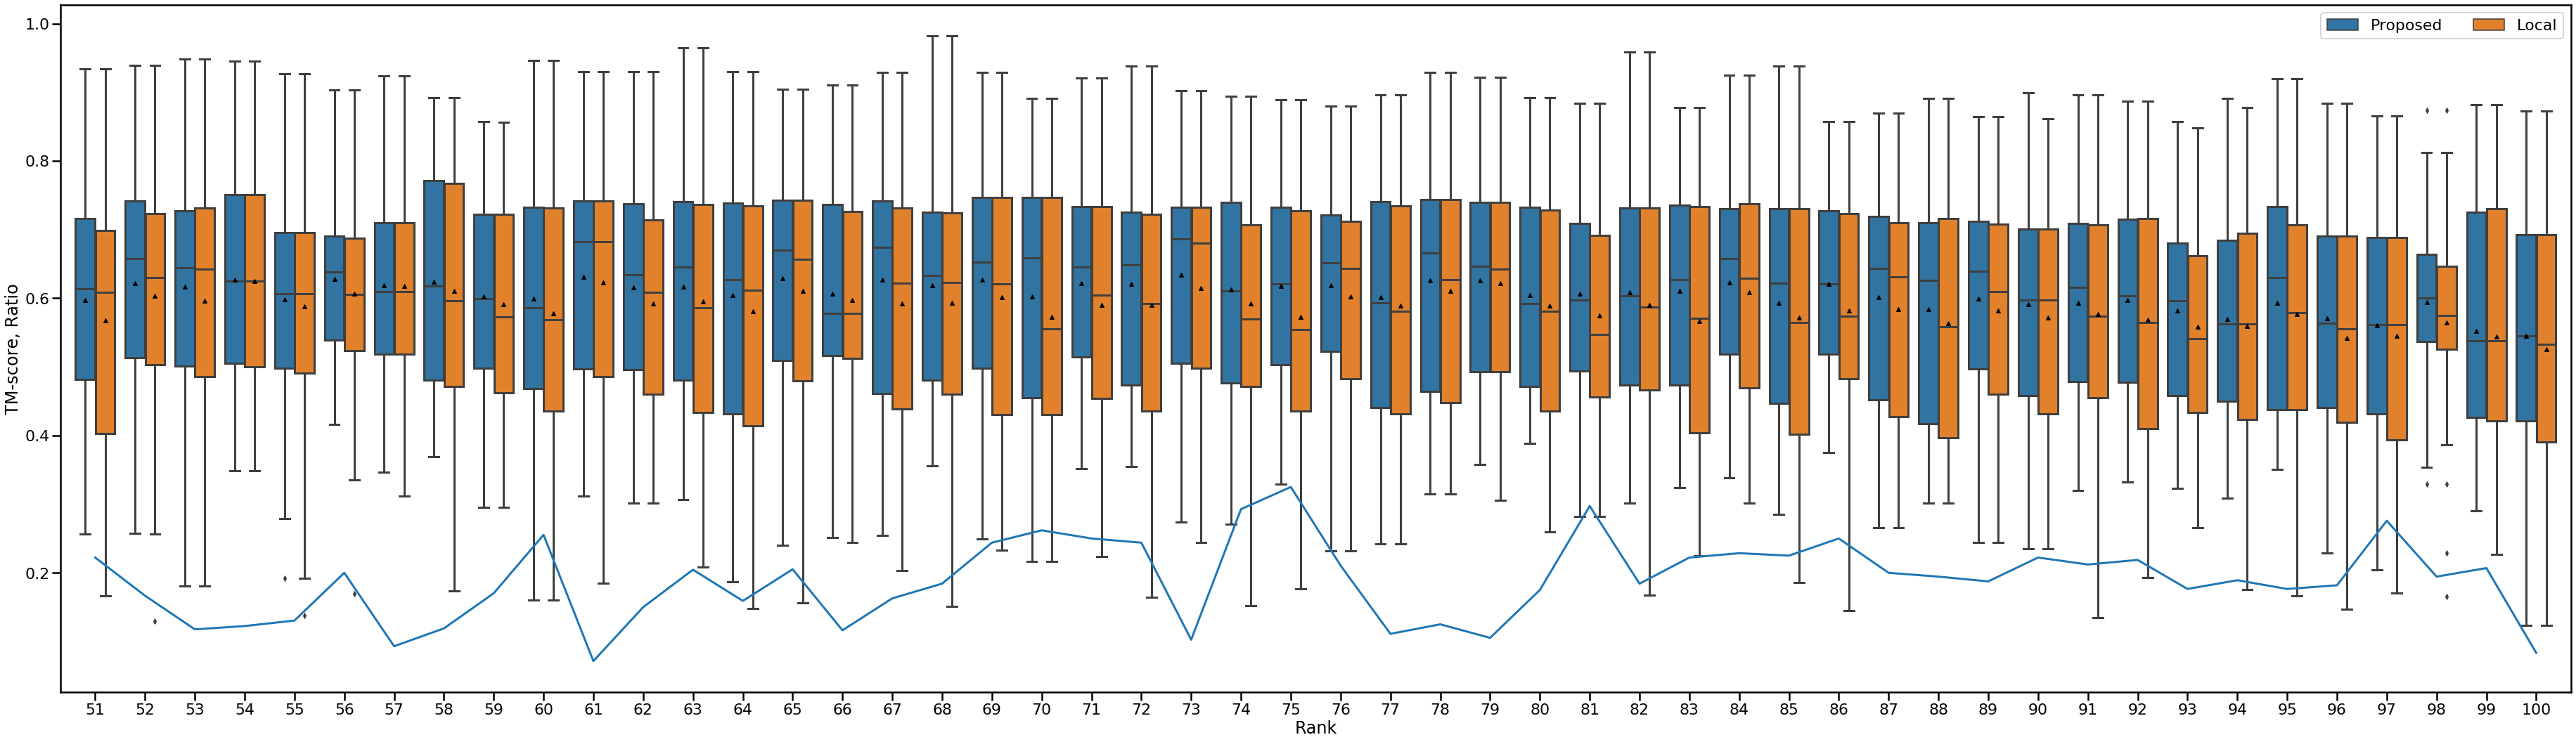

In [35]:
import numpy as np

ilocal_ratio_df = {'Rank': [], 'local': [], 'ilocal': []}
for rank in range(100):
    local_n, ilocal_n = 0, 0
    for query in diff_df[(diff_df['Rank_x'] == rank+1) & (diff_df['Rank_y'] == rank+1) & diff_df['Correct']]['Query']:
        r = np.load(f'data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_local_i_local_p5p5p20/{query}.npy', allow_pickle=True)
        if r[rank][7][1] == 'local':
            local_n += 1
        elif r[rank][7][1] == 'ilocal':
            ilocal_n += 1
        else:
            raise ValueError
    ilocal_ratio_df['Rank'].append(rank)
    ilocal_ratio_df['local'].append(local_n)
    ilocal_ratio_df['ilocal'].append(ilocal_n)

ilocal_ratio_df = pandas.DataFrame.from_dict(ilocal_ratio_df)
ilocal_ratio_df['sum'] = ilocal_ratio_df['local'] + ilocal_ratio_df['ilocal']
ilocal_ratio_df['TM-score, Ratio'] = ilocal_ratio_df['ilocal'] / ilocal_ratio_df['sum']

fig, ax = pyplot.subplots(figsize=(64, 18))
seaborn.boxplot(x='Rank', y='TM-score', hue='Aligner', data=correct_df[correct_df['Rank'] <= 50],
                showmeans=True, ax=ax, meanprops={'markerfacecolor': 'black', 'markeredgecolor': 'black'})
seaborn.lineplot(x='Rank', y='TM-score, Ratio', data=ilocal_ratio_df[ilocal_ratio_df['Rank'] < 50], ax=ax)
ax.legend(ncol=2)
fig.savefig('img/correct_tm_rank_1.pdf', bbox_inches='tight', pad_inches=0)
fig, ax = pyplot.subplots(figsize=(64, 18))
seaborn.boxplot(x='Rank', y='TM-score', hue='Aligner', data=correct_df[correct_df['Rank'] > 50],
                showmeans=True, ax=ax, meanprops={'markerfacecolor': 'black', 'markeredgecolor': 'black'})
seaborn.lineplot(x=range(0, 50), y=ilocal_ratio_df[ilocal_ratio_df['Rank'] >= 50]['TM-score, Ratio'], ax=ax)
ax.legend(ncol=2)
fig.savefig('img/correct_tm_rank_2.pdf', bbox_inches='tight', pad_inches=0)

# diff

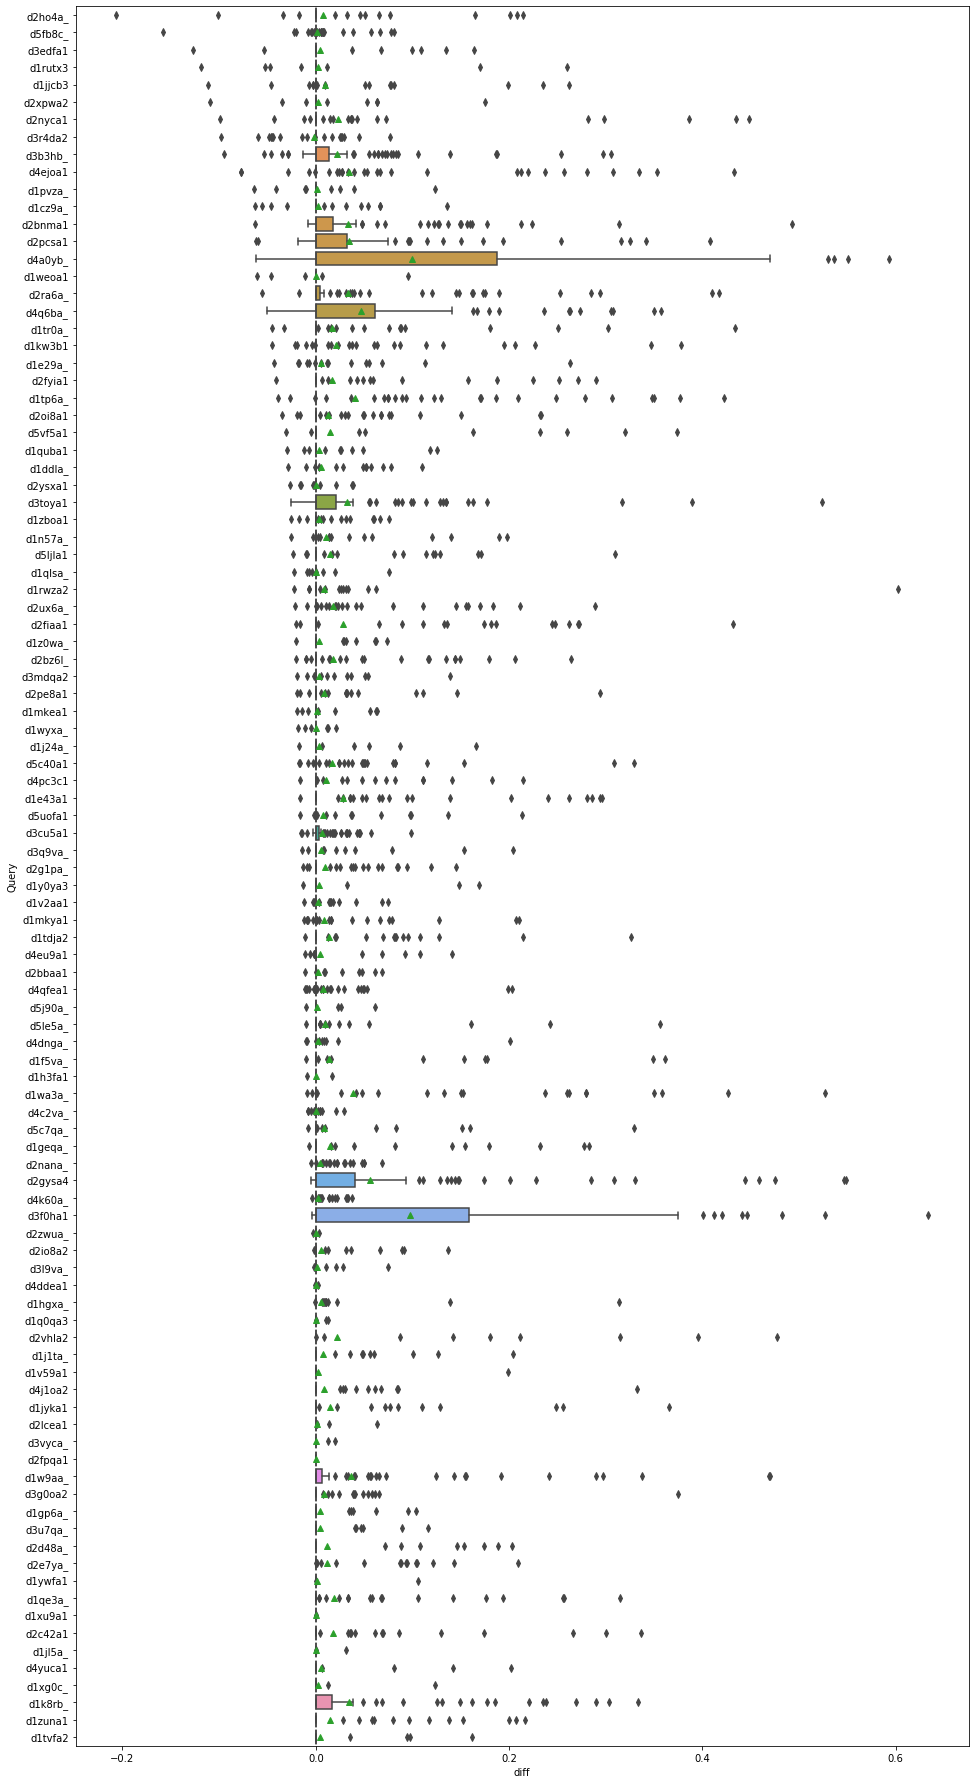

In [21]:
fig, ax = pyplot.subplots(figsize=(16, 32))
seaborn.set_style('ticks')
seaborn.boxplot(x='diff', y='Query', data=diff_df, ax=ax, showmeans=True)

In [10]:
pandas.set_option('display.max_rows', 100)
bads = diff_df[(diff_df['diff'] < -0.05) & diff_df['Correct']]
bads

,Unnamed: 0_x,Aligner_x,Rank_x,TM-score_x,PDB,Unnamed: 0_y,Aligner_y,Rank_y,TM-score_y,diff,Query,Correct
507,507,Local,7,0.75404,d4q6ba__7.pdb,532,Local+iLocal\n(5->5->20),7,0.70373,-0.05031,d4q6ba_,True
1502,1504,Local,17,0.70756,d2bnma1_17.pdb,1484,Local+iLocal\n(5->5->20),17,0.64467,-0.06289,d2bnma1,True
2172,2174,Local,24,0.40899,d2nyca1_24.pdb,2152,Local+iLocal\n(5->5->20),24,0.31002,-0.09897,d2nyca1,True
2964,2967,Local,33,0.66576,d4a0yb__33.pdb,2935,Local+iLocal\n(5->5->20),33,0.60427,-0.06149,d4a0yb_,True
3077,3080,Local,34,0.76321,d3b3hb__34.pdb,3056,Local+iLocal\n(5->5->20),34,0.70963,-0.05358,d3b3hb_,True
3899,3903,Local,43,0.51570,d4ejoa1_43.pdb,3878,Local+iLocal\n(5->5->20),43,0.43818,-0.07752,d4ejoa1,True
4617,4622,Local,50,0.71306,d3b3hb__50.pdb,4593,Local+iLocal\n(5->5->20),50,0.61797,-0.09509,d3b3hb_,True
4732,4737,Local,51,0.55775,d2pcsa1_51.pdb,4704,Local+iLocal\n(5->5->20),51,0.49845,-0.05930,d2pcsa1,True
5157,5162,Local,56,0.56779,d4ejoa1_56.pdb,5128,Local+iLocal\n(5->5->20),56,0.49081,-0.07698,d4ejoa1,True
5296,5303,Local,57,0.45191,d2ra6a__57.pdb,5285,Local+iLocal\n(5->5->20),57,0.39661,-0.05530,d2ra6a_,True


In [11]:
from io import StringIO
from pathlib import Path
import numpy as np
from Bio import AlignIO
from Bio.Align import MultipleSeqAlignment
from Bio.Alphabet import generic_protein

for i in bads.itertuples():
    results = np.load(Path(f'data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_local_i_local_p5p5p20/{i.Query}.npy'), allow_pickle=True)
    result = results[i.Rank_x-1]
    aln = AlignIO.read(StringIO(result[1][0]), format='clustal')
    print(aln.format('clustal'))
    aln = AlignIO.read(StringIO(result[3][0]), format='clustal')
    print(aln.format('clustal'))
    aln = AlignIO.read(StringIO(result[5][0]), format='clustal')
    print(aln.format('clustal'))
    print('#########')

CLUSTAL X (1.81) multiple sequence alignment


d4q6ba_                             --------EEIFIGVAWPFASLDDLFAEGLELAVQEINEQGGVQGRKLSL
UniRef50_A0A1V9I5H0                 SEKDGTIKVGLVAPLSGAMAQDGKSILNAAQLAVDEVNKEGGINKKKIEL

d4q6ba_                             VKADDEAELEKGLAIAQAFADNAGIQAVIGHRNSFISIPAASIYDQAGLV
UniRef50_A0A1V9I5H0                 VYEDDKGEPKEAASIANKYSSNKDIMAVIGSFSAACTLAGIPIYTKAKIP

d4q6ba_                             MLSPASTSPDLTDHGYIHVFRNI-PSDQEIARQLAIY-LAEQGHERMVIY
UniRef50_A0A1V9I5H0                 MMGPCGSAPALSDSS--EYYRKVTPSDLTTGKELSKWMLKDLNYKKVAII

d4q6ba_                             YTDDSYGNGLANAFEDYARAQGITIVDRFNYYGNLKDLERLYDKWQAFGM
UniRef50_A0A1V9I5H0                 YVNNDYGKGVAESVDNFYKENGGQVVAKESYMPKTQDFGSIITKVKSKNP

d4q6ba_                             DGIFIAKTATGGGTEFLVDAKSVGIEVPLIAGNSWDALSLTEDIENIGMT
UniRef50_A0A1V9I5H0                 D-IVIMGSFYGDAGAFLKQAHNVGYN-PKVAGPT--PLLSKSLVDLAGKD

d4q6ba_                             AEGLLVGSFFNPQRPDSRTQDFVEAFRREYGQPPTSYAAAGY

In [25]:
pandas.set_option('display.max_rows', 100)
goods = diff_df[diff_df['diff'] > 0.5]
goods

,Unnamed: 0_x,Aligner_x,Rank_x,TM-score_x,PDB,Unnamed: 0_y,Aligner_y,Rank_y,TM-score_y,diff,Query
6362,6373,sw,68,0.15113,d3toya1_68.pdb,6340,swisw_p5p5p20,68,0.67454,0.52341,d3toya1
6885,6898,sw,74,0.15208,d3f0ha1_74.pdb,6879,swisw_p5p5p20,74,0.67883,0.52675,d3f0ha1
1369,1370,sw,16,0.21316,d1wa3a__16.pdb,1357,swisw_p5p5p20,16,0.74050,0.52734,d1wa3a_
1177,1178,sw,14,0.13145,d4a0yb__14.pdb,1163,swisw_p5p5p20,14,0.66140,0.52995,d4a0yb_
9367,9393,sw,100,0.12813,d4a0yb__100.pdb,9342,swisw_p5p5p20,100,0.66484,0.53671,d4a0yb_
6984,6997,sw,75,0.17670,d2gysa4_75.pdb,6964,swisw_p5p5p20,75,0.72374,0.54704,d2gysa4
2573,2575,sw,29,0.18302,d2gysa4_29.pdb,2561,swisw_p5p5p20,29,0.73189,0.54887,d2gysa4
1360,1361,sw,16,0.12930,d4a0yb__16.pdb,1340,swisw_p5p5p20,16,0.68049,0.55119,d4a0yb_
231,231,sw,4,0.14485,d4a0yb__4.pdb,204,swisw_p5p5p20,4,0.73792,0.59307,d4a0yb_
2926,2929,sw,32,0.11608,d1rwza2_32.pdb,2897,swisw_p5p5p20,32,0.71813,0.60205,d1rwza2


In [20]:
from io import StringIO
from pathlib import Path
import numpy as np
from Bio import AlignIO
from Bio.Align import MultipleSeqAlignment

for i in goods.itertuples():
    results = np.load(Path(f'data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_local_i_local_p5p5p20/{i.Query}.npy'), allow_pickle=True)
    result = results[i.Rank_x-1]
    aln = AlignIO.read(StringIO(result[-2][0]), format='clustal')
    pairwise = MultipleSeqAlignment([aln[0], aln[-1]])
    print(pairwise.format('clustal'))
    results = np.load(Path(f'data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_local/{i.Query}.npy'), allow_pickle=True)
    result = results[i.Rank_x-1]
    aln = AlignIO.read(StringIO(result[-2][0]), format='clustal')
    pairwise = MultipleSeqAlignment([aln[0], aln[-1]])
    print(pairwise.format('clustal'))


CLUSTAL X (1.81) multiple sequence alignment


d3f0ha1                             --------LNFTVGPVMSSEEVRAIGAEQVPYFRTTEFSSTMLENEKFML
d3tqxa_                             VGEKEVLNFCANNYLGLADHPALIKTAQTVVEQYGFGMASVRFI----CG

d3f0ha1                             EYAKAPEGSK--AVFMTCSSTGSMEAVVMNCFTKKDKVLVIDGGSFGHRF
d3tqxa_                             TQTIHKELEKDISEFLGTDDTILYSSCFDANGGLFETLLGPEDAIISDEL

d3f0ha1                             VQLCEIHEIPYVALKLEHGKKLTKEKL-YEY-----DNQNFTGLLVNVDE
d3tqxa_                             NHASIIDGIRLCKAQRYRYKNNAMGDLEAKLKEADEKGARFKLIATDGVF

d3f0ha1                             TSTAVLYDTMMIGEFCKKNNMFFVCDCVSAFLADPFNMNECGADVMITGS
d3tqxa_                             SMDGIIADLKSICDLADKYNALVMVDDSHAVGFIGENGRGTPEYCGVADR

d3f0ha1                             QKVLACPPGISVIVLAPRGVERVEKSKVRTMYFDLKDALKNQERGQTPFT
d3tqxa_                             VDILTGTLGKALGGASGGYTSGHKEIIEWLRNRSRPYLFSNTVAPVIVAT

d3f0ha1                             PAVGILLQINERLKEIKKHGGADAEVARIASQAADFRAKIKD